## Binary Classification

### Goals:
- Introduce the problem of binary classificaiton, a subset of supervised learning
- Visualize binary classification in two dimensions

### Binary Classification
Binary classification can be seen as the "simplest" type of supervised learning. We wish only to label each input with one of two binary options.

For example, we might be  looking at data from particle collisions, and we wish to know if a certain type of particle was produced or not. The keys is that  there are two discrete outcomes.

**In short, we want to learn a mapping from a collection of features X to {0, 1}**. To do this, we have a **training set** of objects with features and their known label.

In [0]:
!pip install --upgrade git+https://github.com/ComputeCanada/ml-workshop-helper.git

  Cloning https://github.com/ComputeCanada/ml-workshop-helper.git to /tmp/pip-req-build-z5t4alm1
  Running command git clone -q https://github.com/ComputeCanada/ml-workshop-helper.git /tmp/pip-req-build-z5t4alm1
  Created wheel for ml-helper: filename=ml_helper-1.0.1556912907-cp36-none-any.whl size=143094 sha256=a5fcfa3e0f3aca8816303a32cafa9b0ff85df3d54f64d61a0280c8f035be2482
  Stored in directory: /tmp/pip-ephem-wheel-cache-z7vpkz8w/wheels/8f/bf/91/772626f0f6a131228a4dfe5d7bdddb478d1f209e771500888f
Successfully built ml-helper


## A Toy Problem

Let's illustrate this idea with an example many of you might be familiar with: classifying cats vs. dogs. We will use **two features**, fur length and ear length to predict a binary yes/no question: is it a cat or a dog? *Note, this data is all made up! This is just an example!*

Reality might look something like this:



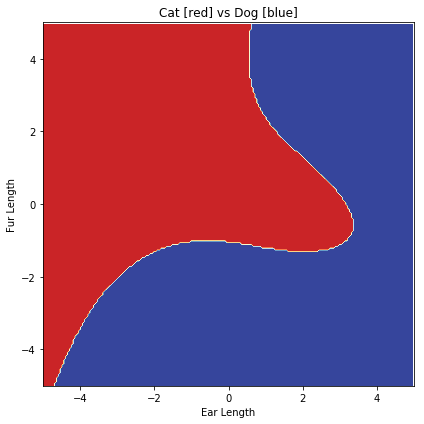

In [0]:
from ml_helper import helper
import matplotlib.pyplot as plt
x, y, amp = helper.gen_planar_samples(seed=1341, deterministic=True)
helper.plot_decision_surface(amp, binary=True, title="Cat [red] vs Dog [blue]", xlabel="Ear Length", ylabel="Fur Length", size=(6, 6))


**The above plot represents underlying reality.** For machine learning, that kind of plot is the ultimate goal.

**We are trying to discover this reality from data.** The actual training data might look something like this:



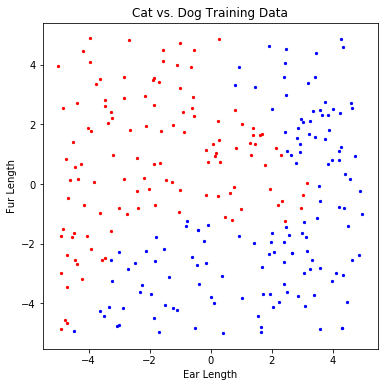

In [0]:
helper.plot_red_blue(x, y, title="Cat vs. Dog Training Data", xlabel="Ear Length", ylabel="Fur Length", size=(6, 6))

Here we see individual observations we have, and their labels. **Each point is a training sample. Its x-y coordinates are the features, and whether it is red or blue is the training label.**

Training labels usually come from expensive human analysis, and that we wish to automate using our classifier. **Our goal is to create a function that takes (x, y) coordinates and outputs red or blue.**

#### A Simple Model

The go-to simple model is a linear classifier. It divides the space of features with a straight line (or hyperplane in higher dimensions), labelling one side red and the other blue.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


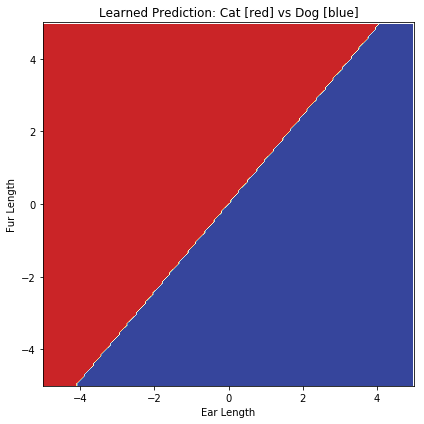

In [0]:
# let's create a linear classifier
# we use the scikit learn library - there will be a more detailed worked example before the main exercise

from sklearn.linear_model import LogisticRegression  # this is actually a classifier -- poor naming!

model = LogisticRegression().fit(x, y)
helper.plot_decision_surface(model.predict_proba, binary=True, title="Learned Prediction: Cat [red] vs Dog [blue]", xlabel="Ear Length", ylabel="Fur Length", size=(6, 6))

The above is what our classifier learned. **For new samples, the classifier will predict those with (x, y) to the left of the line as Cat(red) and to the left as Blue(dog)**'

Let's put all three things together to see the flow:

1. Reality has certain measurable properties -> 
                          2. We take samples from samples of reality ->
                                                            3. We learn an approximation of reality



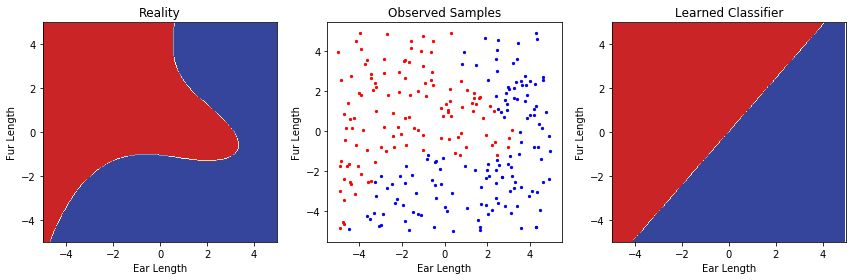

In [0]:
# let's see the flow
plt.figure(); plt.gcf().set_size_inches((12, 4))
ax0 = plt.subplot(1, 3, 1); ax0.set_title("Reality"); ax0.set_xlabel("Ear Length"); ax0.set_ylabel("Fur Length")
ax1 = plt.subplot(1, 3, 2); ax1.set_title("Observed Samples"); ax1.set_xlabel("Ear Length"); ax1.set_ylabel("Fur Length")
ax2 = plt.subplot(1, 3, 3); ax2.set_title("Learned Classifier"); ax2.set_xlabel("Ear Length"); ax2.set_ylabel("Fur Length")

helper.plot_decision_surface(amp, ax=ax0, binary=True); helper.plot_red_blue(x, y, ax=ax1); helper.plot_decision_surface(model.predict_proba, ax=ax2, binary=True)

Compare the underlying reality with what we learned. **Usually our classifier can't capture the full complexity of reality.** It would require infinite data to learn all possible functions -- we need to make simplifying assumptions and approximations. As a rule, **the more data we have, the more complicated distributions we can learn.** This will be the next topic.


Take a moment to make sure you really understand what's happening here. Now is a perfect time for questions! This is important!



## A More Realistic Example

Think about the above problem for a second. In what fundamental way is it not realistic, leaving aside what fur length cats and dogs actually have.

**There exists a cat and a dog that both have the same fur length and ear length.**

In reality, the map from our features to our labels is **not deterministic.** What does that look like? Let's look at some possible samples:



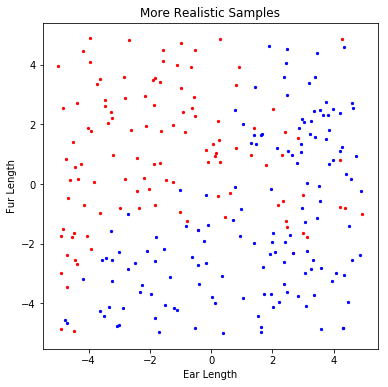

In [0]:
x, y, TRUE_SURFACE = helper.gen_planar_samples(seed=1341)
helper.plot_red_blue(x, y, title="More Realistic Samples", xlabel="Ear Length", ylabel="Fur Length", size=(6, 6))




Looking at the samples, we can see that red and blue are mixed. **The same coordinates can have the same label.**

Can we visualize the underlying reality in this case?


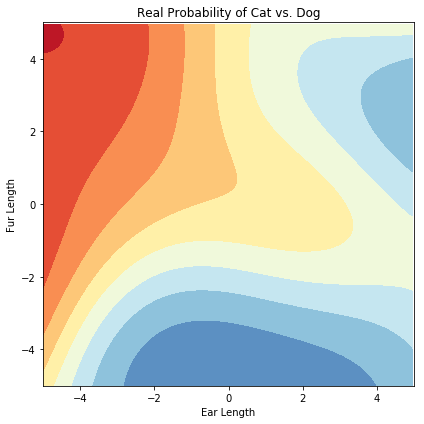

In [0]:
helper.plot_decision_surface(TRUE_SURFACE, title='Real Probability of Cat vs. Dog', xlabel="Ear Length", ylabel="Fur Length", size=(6, 6))

Let's take a pause here to make sure we all understand what we're seeing here. Ask if you're confused!

Now let's look at what our classifier can look like:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


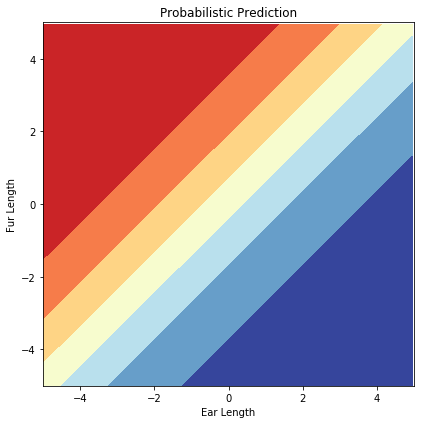

In [0]:
model = LogisticRegression().fit(x, y)
helper.plot_decision_surface(model.predict_proba, title="Probabilistic Prediction", xlabel="Ear Length", ylabel="Fur Length", size=(6, 6))

Many classifiers can also output a (sort-of) probability of the sample being cat or dog, rather than a strict yes or no. We can visualize this similarly to the underlying reality. Again, **the input to the classifier is the (x, y) coordinate -- the features -- and the output is the colour -- the probability of being cat or dog.**

## The Cutoff

One last thing to mention: often we don't want a probability, we want a concerete answer, yes or no, from our classifier. If our classifier outputs a probability, **we have a choice to make**: above which probability do we consider it Cat, and otherwise Dog.

We are free to make this choice based on whether false positives (Dogs labelled as Cats) are worse for our task than false negatives (Cats labelled as Dogs).

The cutoff can make a big difference. Even if we can learn the true probability perfectly, how we choose to classify can affect our results:


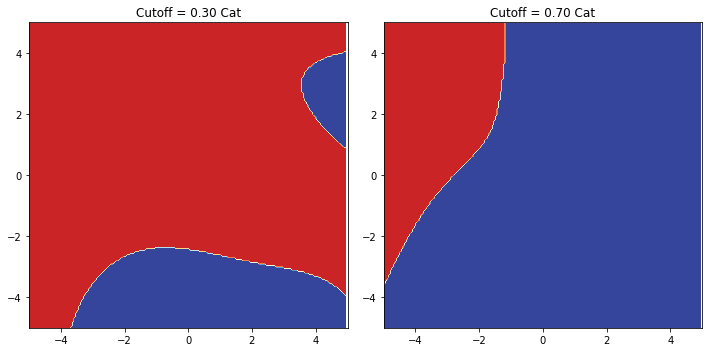

In [0]:
# This is a red-biased cutoff:
plt.figure(); plt.gcf().set_size_inches((10, 5))
ax0 = plt.subplot(1, 2, 1); ax0.set_title('Cutoff = 0.30 Cat')
ax1 = plt.subplot(1, 2, 2); ax1.set_title('Cutoff = 0.70 Cat')
helper.plot_decision_surface(TRUE_SURFACE, ax=ax0, binary=True, cutoff=0.70)
helper.plot_decision_surface(TRUE_SURFACE, ax=ax1, binary=True, cutoff=0.30)